# <center> MATH&ML-9. Математика ансамблевых методов. Часть 2

In [360]:
# Импорты
import sympy
from sympy import Eq, solveset, Symbol, symbols, Interval, S, log, sin, cos, exp, diff, solve, N
from sympy.calculus.util import function_range #импортируем функцию для поиска области значений
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import preprocessing
import matplotlib.pyplot as plt
import plotly.express as px
import xgboost
import catboost
from catboost.utils import get_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Юнит 6. Бустинг. Практика

In [361]:
air_data = pd.read_csv('data/AirPass.zip', index_col=[0])
air_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [362]:
display('Пропущенных значений:', air_data.isna().sum().sum())
air_data.info()

'Пропущенных значений:'

310

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

Gender — пол пассажира (женский, мужской);

Customer Type — тип клиента (постоянный/непостоянный клиент);

Age — возраст клиента;

Type of Travel — цель перелета (личная/деловая поездка);

Class — туристический класс пассажира (Business, Eco, Eco Plus);

Flight distance — расстояние полета;

Inflight wifi service — уровень удовлетворённости Wi-Fi (0 — не применимо, 1–5);

Departure/Arrival time convenient — уровень удовлетворённости временем отправления и прибытия;

Ease of Online booking — уровень удовлетворённости онлайн-бронированием;

Gate location — уровень удовлетворённости расположением выхода на посадку;

Food and drink — уровень удовлетворённости едой и напитками;

Online boarding — уровень удовлетворённости онлайн-регистрацией;

Seat comfort — уровень удовлетворённости комфортом сидений;

Inflight entertainment — уровень удовлетворённости развлечениями на борту;

On-board service — уровень удовлетворённости сервисом на борту;

Leg room service — уровень удовлетворённости местом для ног;

Baggage handling — уровень удовлетворённости обработкой багажа;

Check-in service — уровень удовлетворённости услугами регистрации;

Inflight service — уровень удовлетворённости обслуживанием во время полёта;

Cleanliness — уровень удовлетворённости чистотой;

Departure Delay in Minutes — задержка при отправлении (в минутах);

Arrival Delay in Minutes — задержка при прибытии (в минутах);

Satisfaction — удовлетворённость авиакомпанией — целевая переменная (satisfaction/neutral/dissatisfaction).

In [363]:
# Задание 6.2
air_data['Arrival Delay in Minutes'] = air_data['Arrival Delay in Minutes'].fillna(air_data['Arrival Delay in Minutes'].median())

print('Среднее значение задержки прибытия в минутах:', round(air_data['Arrival Delay in Minutes'].mean(), 2))

Среднее значение задержки прибытия в минутах: 15.13


Text(0.5, 1.0, 'Удовлетворённость женщин')

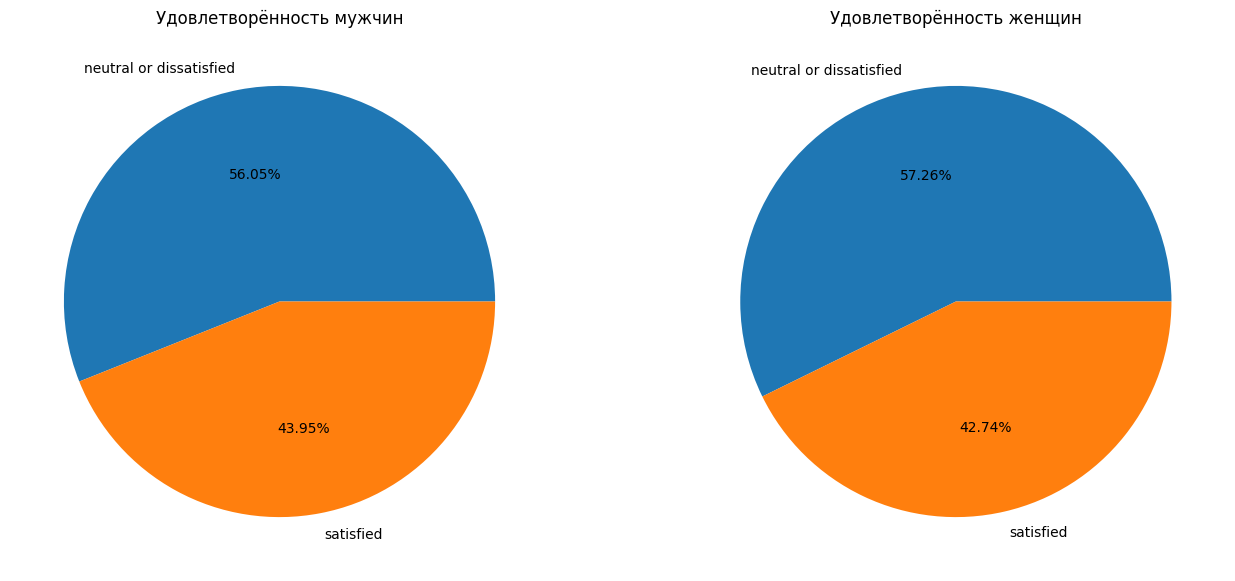

In [364]:
#Задание 6.3

male_satisfaction = air_data[air_data['Gender'] == 'Male']
female_satisfaction = air_data[air_data['Gender'] == 'Female']

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.pie(
    x=male_satisfaction['satisfaction'].value_counts(), 
    labels=male_satisfaction['satisfaction'].value_counts().index.to_list(), 
    autopct='%.2f%%'
    )
plt.title('Удовлетворённость мужчин')

plt.subplot(1, 2, 2)
plt.pie(
    x=female_satisfaction['satisfaction'].value_counts(), 
    labels=female_satisfaction['satisfaction'].value_counts().index.to_list(), 
    autopct='%.2f%%'
    )
plt.title('Удовлетворённость женщин')

Text(0.5, 1.0, 'Удовлетворённость бизнесс-путешествий')

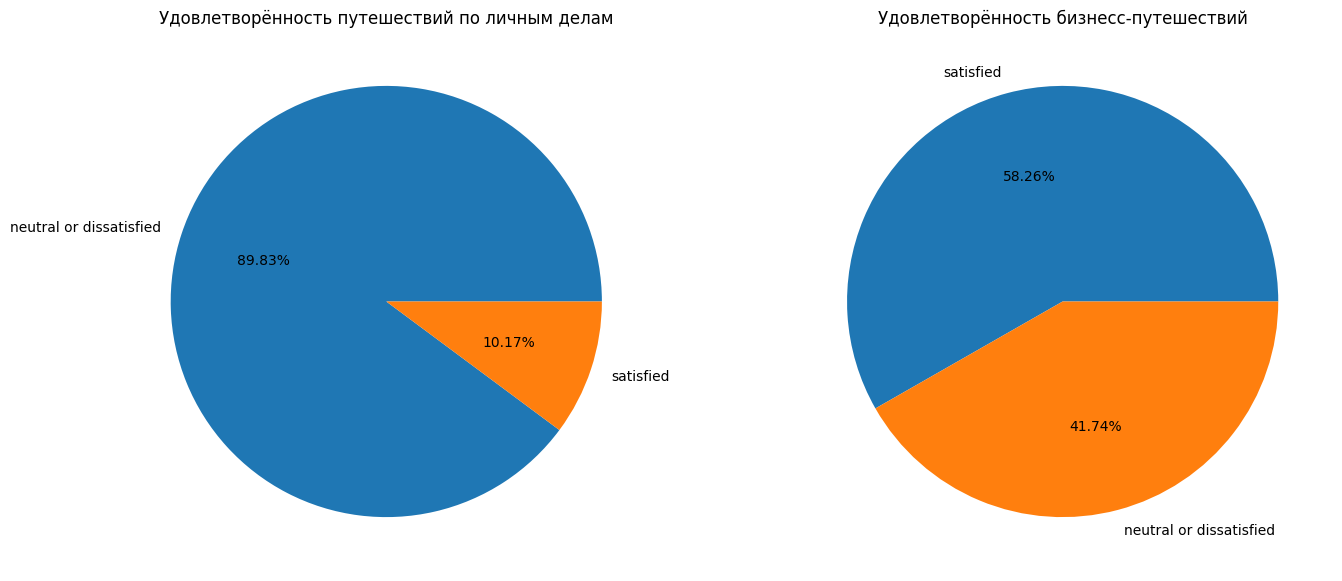

In [365]:
# Все ещё задание 6.3
personal_traver_filter = air_data[air_data['Type of Travel'] == 'Personal Travel']
business_traver_filter = air_data[air_data['Type of Travel'] == 'Business travel']

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.pie(
    x=personal_traver_filter['satisfaction'].value_counts(), 
    labels=personal_traver_filter['satisfaction'].value_counts().index.to_list(), 
    autopct='%.2f%%'
    )
plt.title('Удовлетворённость путешествий по личным делам')

plt.subplot(1, 2, 2)
plt.pie(
    x=business_traver_filter['satisfaction'].value_counts(), 
    labels=business_traver_filter['satisfaction'].value_counts().index.to_list(), 
    autopct='%.2f%%'
    )
plt.title('Удовлетворённость бизнесс-путешествий')

Text(0.5, 1.0, 'Неудовлетворённых в зависимости от класса места')

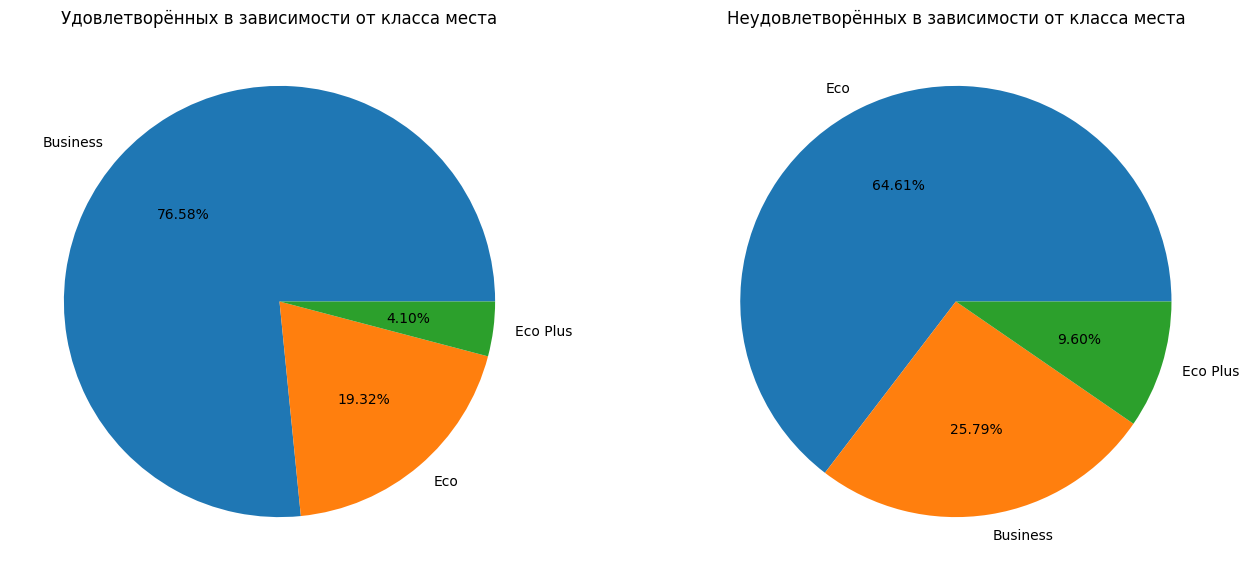

In [366]:
# Тоже 6.3
satisfied_traver_filter = air_data[air_data['satisfaction'] == 'satisfied']
unsatisfied_traver_filter = air_data[air_data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.pie(
    x=satisfied_traver_filter['Class'].value_counts(), 
    labels=satisfied_traver_filter['Class'].value_counts().index.to_list(), 
    autopct='%.2f%%'
    )
plt.title('Удовлетворённых в зависимости от класса места')

plt.subplot(1, 2, 2)
plt.pie(
    x=unsatisfied_traver_filter['Class'].value_counts(), 
    labels=unsatisfied_traver_filter['Class'].value_counts().index.to_list(), 
    autopct='%.2f%%'
    )
plt.title('Неудовлетворённых в зависимости от класса места')

In [367]:
air_data['satisfaction'] = air_data['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
air_data['Customer Type'] = air_data['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
air_data['Type of Travel'] = air_data['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
air_data['Gender'] = air_data['Gender'].map({'Male': 0, 'Female': 1})
air_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  int64  
 2   Customer Type                      103904 non-null  int64  
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  int64  
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [368]:
# Задание 6.4
categoricals = ['Class']

air_data = pd.get_dummies(data=air_data, columns=categoricals)
air_data.shape

(103904, 26)

In [369]:
# Задание 6.5
X = air_data.drop('satisfaction', axis=1)
y = air_data['satisfaction']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=26)

print('Наблюдений в тестовой выборке:', X_test.shape[0])

Наблюдений в тестовой выборке: 20781


In [370]:
#задание 6.6
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Ответ:', round(X_test_scaled[0][0], 2))

Ответ: 0.94


In [371]:
#Задание 6.7

lr_model = linear_model.LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_train_lr = lr_model.predict(X_train_scaled)
y_pred_test_lr = lr_model.predict(X_test_scaled)
print('f1 на обучающей выборке (логистическая регрессия):', round(metrics.f1_score(y_true=y_train, y_pred=y_pred_train_lr), 3))
print('f1 на тестовой выборке (логистическая регрессия):', round(metrics.f1_score(y_true=y_test, y_pred=y_pred_test_lr), 3))
print('-'*20)

f1 на обучающей выборке (логистическая регрессия): 0.854
f1 на тестовой выборке (логистическая регрессия): 0.855
--------------------


In [372]:
#Задание 6.8
base_estimator = tree.DecisionTreeClassifier(random_state=26)
adaboost_model = ensemble.AdaBoostClassifier(estimator=base_estimator, random_state=26, learning_rate=0.01)
adaboost_model.fit(X_train_scaled, y_train)

y_pred_train_abc = adaboost_model.predict(X_train_scaled)
y_pred_test_abc = adaboost_model.predict(X_test_scaled)
print('f1 на обучающей выборке (Адаптивный бустинг):', round(metrics.f1_score(y_true=y_train, y_pred=y_pred_train_abc), 3))
print('f1 на тестовой выборке (Адаптивный бустинг):', round(metrics.f1_score(y_true=y_test, y_pred=y_pred_test_abc), 3))
print('-'*20)

c:\Users\telis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


f1 на обучающей выборке (Адаптивный бустинг): 1.0
f1 на тестовой выборке (Адаптивный бустинг): 0.94
--------------------


In [373]:
#Задание 6.9
params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}

gbc_grid_model = model_selection.GridSearchCV(
    estimator=ensemble.GradientBoostingClassifier(),
    cv=3,
    param_grid=params,
    n_jobs = -1
)
%time gbc_grid_model.fit(X_train_scaled, y_train)

gbc_best_model = gbc_grid_model.best_estimator_

y_pred_train_gbc = gbc_best_model.predict(X_train_scaled)
y_pred_test_gbc = gbc_best_model.predict(X_test_scaled)
print('Лучшие гиперпараметры:', gbc_grid_model.best_params_)
print('f1 на обучающей выборке (Градиентный бустинг):', round(metrics.f1_score(y_true=y_train, y_pred=y_pred_train_gbc), 3))
print('f1 на тестовой выборке (Градиентный бустинг):', round(metrics.f1_score(y_true=y_test, y_pred=y_pred_test_gbc), 3))
print('-'*20)

CPU times: total: 13.7 s
Wall time: 39.3 s
Лучшие гиперпараметры: {'learning_rate': 1.0, 'n_estimators': 128}
f1 на обучающей выборке (Градиентный бустинг): 0.961
f1 на тестовой выборке (Градиентный бустинг): 0.951
--------------------


In [374]:
#Задание 6.10
xgb_model = xgboost.XGBClassifier(random_state=26)
xgb_model.fit(X_train_scaled, y_train)

y_pred_train_xgb = xgb_model.predict(X_train_scaled)
y_pred_test_xgb = xgb_model.predict(X_test_scaled)
print('f1 на обучающей выборке (Экстремальный градиентный бустинг):', 
      round(metrics.f1_score(y_true=y_train, y_pred=y_pred_train_xgb), 3))
print('f1 на тестовой выборке (Экстремальный градиентный бустинг):', 
      round(metrics.f1_score(y_true=y_test, y_pred=y_pred_test_xgb), 3))
print('-'*20)

f1 на обучающей выборке (Экстремальный градиентный бустинг): 0.976
f1 на тестовой выборке (Экстремальный градиентный бустинг): 0.957
--------------------


In [375]:
#Задание 6.11
cb_model = catboost.CatBoostClassifier(random_state=26)
#Создаем пулл данных для учета имен признаков и для удобства
train_scaled_pool = catboost.Pool(X_train_scaled, y_train, feature_names=X_train.columns.to_list())
cb_model.fit(train_scaled_pool)

y_pred_train_cb = cb_model.predict(X_train_scaled)
y_pred_test_cb = cb_model.predict(X_test_scaled)
print('f1 на обучающей выборке (Категориальный бустинг):', 
      round(metrics.f1_score(y_true=y_train, y_pred=y_pred_train_cb), 3))
print('f1 на тестовой выборке (Категориальный бустинг):', 
      round(metrics.f1_score(y_true=y_test, y_pred=y_pred_test_cb), 3))
print('-'*20)

Learning rate set to 0.068023
0:	learn: 0.6018151	total: 7.15ms	remaining: 7.14s
1:	learn: 0.5020758	total: 13.3ms	remaining: 6.62s
2:	learn: 0.4472471	total: 19.8ms	remaining: 6.57s
3:	learn: 0.4028689	total: 26.3ms	remaining: 6.54s
4:	learn: 0.3674734	total: 33.3ms	remaining: 6.63s
5:	learn: 0.3397847	total: 39.8ms	remaining: 6.59s
6:	learn: 0.3121211	total: 45.6ms	remaining: 6.47s
7:	learn: 0.2917500	total: 51.7ms	remaining: 6.41s
8:	learn: 0.2749040	total: 57.5ms	remaining: 6.33s
9:	learn: 0.2575190	total: 63.3ms	remaining: 6.27s
10:	learn: 0.2473691	total: 68.9ms	remaining: 6.19s
11:	learn: 0.2377533	total: 74.3ms	remaining: 6.12s
12:	learn: 0.2279311	total: 80.4ms	remaining: 6.1s
13:	learn: 0.2212511	total: 86ms	remaining: 6.05s
14:	learn: 0.2100357	total: 91.5ms	remaining: 6.01s
15:	learn: 0.2025732	total: 97.6ms	remaining: 6s
16:	learn: 0.1942300	total: 103ms	remaining: 5.96s
17:	learn: 0.1877937	total: 109ms	remaining: 5.94s
18:	learn: 0.1832380	total: 115ms	remaining: 5.93s
1

In [376]:
# Задание 6.12
np.round(get_confusion_matrix(cb_model, catboost.Pool(X_train_scaled, y_train))/X_train.shape[0]*100)

array([[56.,  1.],
       [ 2., 42.]])

In [377]:
# Задание 6.13
print('Таблица важности признаков:')
cb_model.get_feature_importance(prettified=True)

Таблица важности признаков:


,Feature Id,Importances
0,Inflight wifi service,26.001691
1,Type of Travel,17.854438
2,Online boarding,7.582693
3,Customer Type,7.291082
4,Class_Business,5.334009
5,Checkin service,3.935882
6,Baggage handling,3.675108
7,Age,3.653960
8,Gate location,3.537978
9,Inflight service,2.840194


### Юнит 7. Стекинг

In [378]:
frogs_data = pd.read_csv('data/Frogs_MFCCs.csv')
display('Изначальный датасет:', frogs_data.head())

frogs_data['Family'] = frogs_data['Family'].apply(lambda x: 1 if x=='Dendrobatidae' else 0)

# Удаляем ненужное
frogs_data = frogs_data.drop(['Genus', 'Species', 'RecordID'], axis=1)
display('Подготовленный датасет:', frogs_data.head())

X = frogs_data.drop('Family', axis=1)
y = frogs_data['Family']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=31)
y_train.value_counts()

'Изначальный датасет:'

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


'Подготовленный датасет:'

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,0
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,0
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,0
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,0
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,0


Family
0    5308
1     448
Name: count, dtype: int64

In [379]:
#Задание 7.5
rf_model = ensemble.RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)
print('f1 на обучающей выборке (Случайный лес):', 
      round(metrics.f1_score(y_true=y_train, y_pred=y_pred_train_rf), 2))
print('f1 на тестовой выборке (Случайный лес):', 
      round(metrics.f1_score(y_true=y_test, y_pred=y_pred_test_rf), 2))
print('-'*20)

f1 на обучающей выборке (Случайный лес): 1.0
f1 на тестовой выборке (Случайный лес): 0.97
--------------------


In [382]:
# kNN_model = KNeighborsClassifier(n_neighbors=11)
# kNN_model.fit(X_train, y_train)

# nb_model = GaussianNB()
# nb_model.fit(X_train, y_train)

estimators = [
    ('rf', ensemble.RandomForestClassifier(random_state=42, n_estimators=10)),
    ('kNN', KNeighborsClassifier(n_neighbors=11)),
    ('nb', GaussianNB())
]

stacking_model = ensemble.StackingClassifier(estimators=estimators)
stacking_model.fit(X_train, y_train)

y_pred_train_stack = stacking_model.predict(X_train)
y_pred_test_stack = stacking_model.predict(X_test)
print('f1 на обучающей выборке (Стэкинг):', 
      round(metrics.f1_score(y_true=y_train, y_pred=y_pred_train_stack), 2))
print('f1 на тестовой выборке (Стэкинг):', 
      round(metrics.f1_score(y_true=y_test, y_pred=y_pred_test_stack), 2))
print('-'*20)

f1 на обучающей выборке (Стэкинг): 1.0
f1 на тестовой выборке (Стэкинг): 0.99
--------------------
